# 1. Data Preparation
 1.1 Load data \
 1.2 Add a penalty info related columns \
 1.3 Filter dataframe \
 1.4 Update team info frame with power play and penalty kill count

In [1]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#A list of hex colours running between blue and purpleCB91_Grad_BP 
colors = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',                
        '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',                
        '#489bee', '#4b97ec', '#4f92ea', '#528ee8',                
        '#568ae6', '#5986e4', '#5c81e2', '#607de0',                
        '#6379de', '#6775dc', '#6a70da', '#6e6cd8',                
        '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',                
        '#7f57cf', '#8353cd', '#864ecb', '#894ac9',                
        '#8d46c7', '#9042c5', '#943dc3', '#9739c1',                
        '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',                
        '#a924b7', '#ac20b5', '#b01bb3', '#b317b1'] 

In [2]:
df = pd.read_csv('data/Rotman MMA Summer Datathon NWHL.csv')
df_game_info = pd.read_csv('data/game_info.csv', sep="\t")
df_event_info = pd.read_csv('data/event_info.csv', sep="\t")
df_player_info = pd.read_csv('data/player_info.csv', sep="\t")
df_team_info = pd.read_csv('data/team_info.csv', sep="\t")


In [3]:
df_team_info.head()

,Team_Name,num_home_game,num_away_game,num_game
0,Boston Pride,2,5,7
1,Buffalo Beauts,4,2,6
2,Connecticut Whale,2,2,4
3,Metropolitan Riveters,2,1,3
4,Minnesota Whitecaps,1,3,4


In [4]:
len(df)

26882

In [5]:
df.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [6]:
# add a penalty_period column to distinguish different penalty periods
df["penalty_period"] = np.where(df["Event"]=="Penalty Taken", 1, 0)
df["penalty_period"] = df["penalty_period"].cumsum()

In [7]:
df.query("Event == 'Penalty Taken'")

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,penalty_period
210,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:48,5,5,0,0,Minnesota Whitecaps,...,83,46,Tripping,NaN,NaN,NaN,Taylor Wenczkowski,NaN,NaN,1
295,2021-01-23,Minnesota Whitecaps,Boston Pride,1,9:57,5,5,0,0,Minnesota Whitecaps,...,10,12,Roughing,NaN,NaN,NaN,Carlee Turner,NaN,NaN,2
458,2021-01-23,Minnesota Whitecaps,Boston Pride,1,4:18,5,5,1,1,Minnesota Whitecaps,...,5,30,Hooking,NaN,NaN,NaN,Meghara McManus,NaN,NaN,3
503,2021-01-23,Minnesota Whitecaps,Boston Pride,1,2:15,5,5,1,1,Boston Pride,...,162,83,Interference,NaN,NaN,NaN,NaN,NaN,NaN,4
682,2021-01-23,Minnesota Whitecaps,Boston Pride,2,15:30,5,5,1,1,Minnesota Whitecaps,...,94,5,Hooking,NaN,NaN,NaN,Tereza Vanisova,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26442,2021-02-01,Buffalo Beauts,Boston Pride,3,17:12,5,5,1,4,Boston Pride,...,190,64,Tripping,NaN,NaN,NaN,Whitney Dove,NaN,NaN,140
26582,2021-02-01,Buffalo Beauts,Boston Pride,3,11:27,5,5,1,5,Buffalo Beauts,...,84,67,Tripping,NaN,NaN,NaN,Meghara McManus,NaN,NaN,141
26619,2021-02-01,Buffalo Beauts,Boston Pride,3,9:55,5,5,1,6,Boston Pride,...,137,84,Holding,NaN,NaN,NaN,Autumn MacDougall,NaN,NaN,142
26706,2021-02-01,Buffalo Beauts,Boston Pride,3,6:27,5,5,1,7,Buffalo Beauts,...,151,82,Interference,NaN,NaN,NaN,Taylor Wenczkowski,NaN,NaN,143


In [8]:
# choose power play / penalty kill moment by compare the number of players on the court
df = df[df["Home Team Skaters"] != df["Away Team Skaters"]]

In [9]:
# change column names for sql
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [10]:
len(df)

5898

In [11]:
df.head(5)

,game_date,Home_Team,Away_Team,Period,Clock,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,Team,...,X_Coordinate,Y_Coordinate,Detail_1,Detail_2,Detail_3,Detail_4,Player_2,X_Coordinate_2,Y_Coordinate_2,penalty_period
211,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:48,4,5,0,0,Boston Pride,...,169,65,Forehand,NaN,NaN,NaN,Jonna Curtis,NaN,NaN,1
212,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:47,4,5,0,0,Boston Pride,...,144,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
213,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:45,4,5,0,0,Boston Pride,...,130,83,Direct,NaN,NaN,NaN,Lauren Kelly,131.0,59.0,1
214,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:43,4,5,0,0,Boston Pride,...,136,32,Direct,NaN,NaN,NaN,Taylor Turnquist,159.0,4.0,1
215,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:39,4,5,0,0,Boston Pride,...,162,2,Direct,NaN,NaN,NaN,Lauren Kelly,129.0,49.0,1


In [12]:
# add a column "is_power_play_event" to indicate whether the event happening belongs to a power play or penalty kill
# 1 for power play, 
# 0 for penalty kill
df['is_power_play_event'] = np.where(
    ((df['Home_Team'] == df['Team']) & (df["Home_Team_Skaters"] > df["Away_Team_Skaters"])) | 
    ((df['Away_Team'] == df['Team']) & (df["Home_Team_Skaters"] < df["Away_Team_Skaters"])), 
    1, 0)

In [13]:
# add two columns to indicate which team is in power play
df["Power_Play_Team"] = np.where(df["Home_Team_Skaters"] > df["Away_Team_Skaters"], df["Home_Team"], df["Away_Team"])
df["Penalty_Kill_Team"] = np.where(df["Home_Team_Skaters"] > df["Away_Team_Skaters"], df["Away_Team"], df["Home_Team"])


In [14]:
df.tail()

,game_date,Home_Team,Away_Team,Period,Clock,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,Team,...,Detail_2,Detail_3,Detail_4,Player_2,X_Coordinate_2,Y_Coordinate_2,penalty_period,is_power_play_event,Power_Play_Team,Penalty_Kill_Team
26877,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,NaN,NaN,NaN,144,0,Boston Pride,Buffalo Beauts
26878,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,Cassidy MacPherson,29.0,82.0,144,0,Boston Pride,Buffalo Beauts
26879,2021-02-01,Buffalo Beauts,Boston Pride,3,0:05,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,NaN,NaN,NaN,144,0,Boston Pride,Buffalo Beauts
26880,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,...,NaN,NaN,NaN,NaN,NaN,NaN,144,1,Boston Pride,Buffalo Beauts
26881,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,...,NaN,NaN,NaN,Lexie Laing,155.0,6.0,144,1,Boston Pride,Buffalo Beauts


In [15]:
# count the number of power play and penalty kill period for each team
df_power_play_count = df.groupby("Power_Play_Team").penalty_period.nunique().reset_index().rename(columns={"penalty_period": "power_play_count"})
df_penalty_count = df.groupby("Penalty_Kill_Team").penalty_period.nunique().reset_index().rename(columns={"penalty_period": "penalty_kill_count"})


In [16]:
df_penalty_count

,Penalty_Kill_Team,penalty_kill_count
0,Boston Pride,27
1,Buffalo Beauts,30
2,Connecticut Whale,19
3,Metropolitan Riveters,13
4,Minnesota Whitecaps,25
5,Toronto Six,33


In [17]:
# update team info frame with power play and penalty kill count
df_team_info = pd.merge(df_team_info, df_power_play_count, left_on="Team_Name", right_on="Power_Play_Team", )
df_team_info = pd.merge(df_team_info, df_penalty_count, left_on="Team_Name", right_on="Penalty_Kill_Team", )
df_team_info = df_team_info[["Team_Name", "num_home_game", "num_away_game", "num_game", "power_play_count", "penalty_kill_count"]]
df_team_info

,Team_Name,num_home_game,num_away_game,num_game,power_play_count,penalty_kill_count
0,Boston Pride,2,5,7,47,27
1,Buffalo Beauts,4,2,6,22,30
2,Connecticut Whale,2,2,4,12,19
3,Metropolitan Riveters,2,1,3,12,13
4,Minnesota Whitecaps,1,3,4,22,25
5,Toronto Six,4,2,6,32,33


# 2. Find Penalty Kill Specialists
 The key skills for a penalty killer are takeaways and precise passes. 

In [18]:
df_penalty_kill = df[df['is_power_play_event'] == 0]

### 2.1 Find the players with most takeaways in penalty kill
<ol>
  <li>in total</li>
  <li>per game </li>
  <li>per penalty kill</li>
</ol>
   
   
   

In [19]:
df_penalty_kill_takeaways = df_penalty_kill[df_penalty_kill['Event'] == 'Takeaway']

In [20]:
len(df_penalty_kill_takeaways)

124

In [21]:
# count the number of takeaways for each player in the penalty kill
df_penalty_kill_takeaways_count = df_penalty_kill_takeaways["Player"].groupby(df_penalty_kill_takeaways["Player"]).count().sort_values(ascending=False).reset_index(name="takeaway_count")

In [22]:
df_penalty_kill_takeaways_count.head()

,Player,takeaway_count
0,Meghara McManus,8
1,Taylor Woods,7
2,Natalie Marcuzzi,5
3,Sydney Baldwin,5
4,Taylor Turnquist,4


In [23]:
df_player_info.head()

,Team,Player,num_game
0,Boston Pride,Jillian Dempsey,7
1,Boston Pride,McKenna Brand,7
2,Boston Pride,Tereza Vanisova,7
3,Boston Pride,Samantha Davis,7
4,Minnesota Whitecaps,Stephanie Anderson,4


In [24]:
df_player_info.query("Player == 'Taylor Woods'")

,Team,Player,num_game
94,Toronto Six,Taylor Woods,6


In [25]:
df_team_info.head()

,Team_Name,num_home_game,num_away_game,num_game,power_play_count,penalty_kill_count
0,Boston Pride,2,5,7,47,27
1,Buffalo Beauts,4,2,6,22,30
2,Connecticut Whale,2,2,4,12,19
3,Metropolitan Riveters,2,1,3,12,13
4,Minnesota Whitecaps,1,3,4,22,25


In [26]:
# join the three tables above to figure out the takeaway stats of each player in penalty kill

df_penalty_kill_takeaways_player_stats = pd.merge(df_penalty_kill_takeaways_count, df_player_info, on="Player")
df_penalty_kill_takeaways_player_stats = pd.merge(df_penalty_kill_takeaways_player_stats, df_team_info, left_on="Team", right_on="Team_Name")
df_penalty_kill_takeaways_player_stats = df_penalty_kill_takeaways_player_stats.assign(takeaway_per_game = lambda x: x["takeaway_count"] / x["num_game_x"],
                                                                                       takeaway_per_penalty_kill = lambda x: x["takeaway_count"] / x["penalty_kill_count"])
df_penalty_kill_takeaways_player_stats = df_penalty_kill_takeaways_player_stats.round(2)



In [27]:
df_penalty_kill_takeaways_player_stats = df_penalty_kill_takeaways_player_stats[["Player", "Team", "takeaway_count", "num_game_x", "takeaway_per_game", "penalty_kill_count", "takeaway_per_penalty_kill"]]
df_penalty_kill_takeaways_player_stats.sort_values(by="takeaway_per_penalty_kill", ascending=False, inplace=True)
df_penalty_kill_takeaways_player_stats.head()

,Player,Team,takeaway_count,num_game_x,takeaway_per_game,penalty_kill_count,takeaway_per_penalty_kill
0,Meghara McManus,Boston Pride,8,7,1.14,27,0.30
53,Cailey Hutchison,Metropolitan Riveters,3,3,1.00,13,0.23
13,Taylor Woods,Toronto Six,7,6,1.17,33,0.21
25,Sydney Baldwin,Minnesota Whitecaps,5,4,1.25,25,0.20
43,Kayla Friesen,Connecticut Whale,3,4,0.75,19,0.16


### 2.2 Find the players with most precise passes in penalty kill
   

In [28]:
df_complete_play_pk = df_penalty_kill[df_penalty_kill["Event"]=="Play"]
df_incomplete_pass_pk = df_penalty_kill[df_penalty_kill["Event"]=="Incomplete Play"]

In [29]:
# there are very few passes in situation of penalty kill
print(len(df_complete_play_pk), len(df_incomplete_pass_pk))

127 80


In [30]:
df_complete_play_count = df_complete_play_pk.groupby("Player").size().reset_index("Player", name="complete_play_count")
df_incomplete_play_count = df_incomplete_pass_pk.groupby("Player").size().reset_index("Player", name="incomplete_play_count")

In [31]:
df_complete_play_count.head()

,Player,complete_play_count
0,Alyson Matteau,4
1,Breanne Wilson-Bennett,1
2,Briana Mastel,3
3,Brooke Stacey,1
4,Carlee Turner,2


In [32]:
df_incomplete_play_count.head()

,Player,incomplete_play_count
0,Allie Thunstrom,1
1,Alyson Matteau,1
2,Briana Mastel,1
3,Brooke Stacey,1
4,Carlee Turner,1


In [33]:
df_play_penalty_kill = pd.merge(df_complete_play_count, df_incomplete_play_count, on="Player", how="left")
df_play_penalty_kill.fillna(0, inplace=True)
df_play_penalty_kill["total_play_count"] = df_play_penalty_kill["complete_play_count"] + df_play_penalty_kill["incomplete_play_count"]
df_play_penalty_kill["complete_play_rate"] = df_play_penalty_kill["complete_play_count"] / df_play_penalty_kill["total_play_count"]

# Only take players with at least 3 passes into account, since too few samples may not represent the real situation for a player
df_play_penalty_kill = df_play_penalty_kill[df_play_penalty_kill["total_play_count"] > 2.5]

In [34]:
df_play_penalty_kill.head()

,Player,complete_play_count,incomplete_play_count,total_play_count,complete_play_rate
0,Alyson Matteau,4,1.0,5.0,0.800000
2,Briana Mastel,3,1.0,4.0,0.750000
4,Carlee Turner,2,1.0,3.0,0.666667
6,Chelsey Brodt-Rosenthal,2,1.0,3.0,0.666667
8,Dominique Kremer,2,2.0,4.0,0.500000


### 2.3 Merge the takeaway and play dataframe and visualize the top penalty kill players

In [35]:
df_top_pk_player = pd.merge(df_penalty_kill_takeaways_player_stats, df_play_penalty_kill, on="Player")
df_top_pk_player.sort_values(by=["takeaway_per_penalty_kill", "complete_play_rate"], ascending=[True, True], inplace=True)
df_top_pk_player = df_top_pk_player[-20:]
df_top_pk_player

,Player,Team,takeaway_count,num_game_x,takeaway_per_game,penalty_kill_count,takeaway_per_penalty_kill,complete_play_count,incomplete_play_count,total_play_count,complete_play_rate
17,Jillian Dempsey,Boston Pride,1,7,0.14,27,0.04,2,1.0,3.0,0.666667
19,McKenna Brand,Boston Pride,1,7,0.14,27,0.04,3,1.0,4.0,0.750000
20,Paige Capistran,Boston Pride,1,7,0.14,27,0.04,5,1.0,6.0,0.833333
16,Lindsay Eastwood,Toronto Six,2,6,0.33,33,0.06,3,4.0,7.0,0.428571
14,Lexie Laing,Boston Pride,2,7,0.29,27,0.07,2,2.0,4.0,0.500000
15,Briana Mastel,Boston Pride,2,7,0.29,27,0.07,3,1.0,4.0,0.750000
13,Jonna Curtis,Minnesota Whitecaps,2,4,0.50,25,0.08,3,2.0,5.0,0.600000
12,Chelsey Brodt-Rosenthal,Minnesota Whitecaps,2,4,0.50,25,0.08,2,1.0,3.0,0.666667
11,Dominique Kremer,Buffalo Beauts,3,6,0.50,30,0.10,2,2.0,4.0,0.500000
9,Hanna Beattie,Connecticut Whale,2,4,0.50,19,0.11,3,2.0,5.0,0.600000


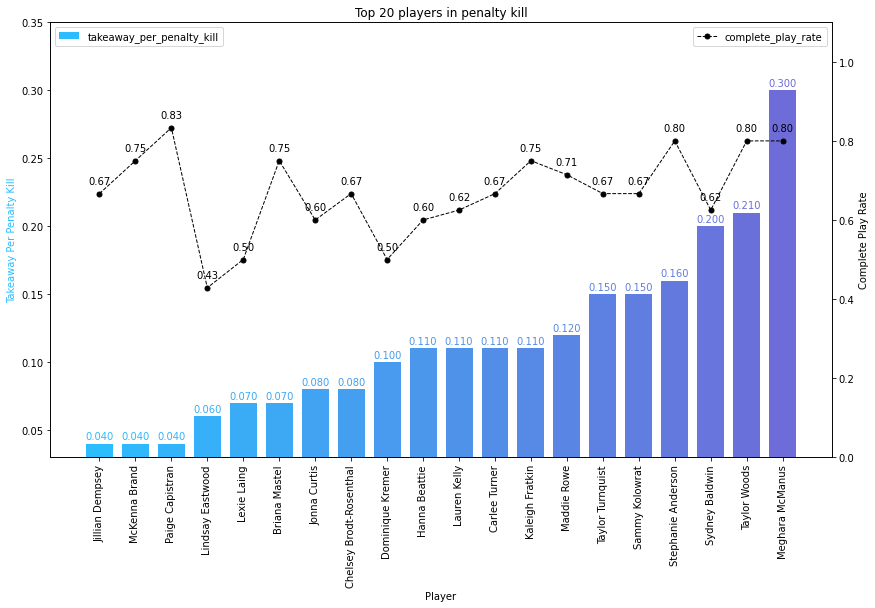

In [36]:
from utils.plot_utils import add_value_labels

fig, ax1 = plt.subplots(figsize=(14,8))

X_axis = np.arange(len(df_top_pk_player))
p1 = ax1.bar(x=X_axis, height=df_top_pk_player["takeaway_per_penalty_kill"], color=colors, width=0.75, label="takeaway_per_penalty_kill")
ax1.set_xlabel('Player')
ax1.set_ylabel('Takeaway Per Penalty Kill', color='#2cbdfe')
ax1.set_xticks(X_axis, df_top_pk_player['Player'], rotation=90)
ax1.set_ylim(0.03, 0.35)

add_value_labels(ax1, colors)
# ax1.bar_label(p1, df_top_pk_player["takeaway_per_penalty_kill"], color='k')
ax1.legend(loc='upper left')

ax2 = plt.twinx()
ax2.plot(X_axis, df_top_pk_player["complete_play_rate"], color='k', linestyle='--', marker='o', linewidth=1, markersize=5, label="complete_play_rate")
ax2.set_ylabel("Complete Play Rate", color='k')
ax2.set_xticks(X_axis, df_top_pk_player['Player'], rotation=90)
ax2.set_ylim(0.0, 1.1)
for a, b in zip(X_axis, df_top_pk_player["complete_play_rate"]):
        plt.text(a, b+0.02, '%.2f' % b, ha='center', va='bottom', fontsize=10)

ax2.legend(loc='upper right')

plt.title("Top 20 players in penalty kill")
plt.show()

### Hence *visually* the top four penalty kill specialists are:
<ol>
  <li>Meghara McManus</li>
  <li>Taylor Woods</li>
  <li>Sydney Baldwin</li>
  <li>Stephanie Anderson</li>
</ol>



In [37]:
## TODO 1: Penalty Kill Specialists OPTIMIZATION:
# 1. Use More parameters and apply weighted average to conclude the result 
# 2. Optimize the plot above, 
#   2.1 maybe using stacked bar plot after applying the weights is better
#   2.2 adjust the plot style to better fit our Rotman PPT template (this is actually important)
# * 3. Take the coordinate parameter into account, find the best penalty kill player in different zones
# 4. There are direct and indirect plays, we can extend the analysis on the kind of play
# 5. Maybe we should try to augment the data, since the amount of data is not enough to make a good conclusion
# 6. TBD

In [38]:
# TODO 2: Power Play Specialists Analysis
# TODO 3: PPT 

# 3. Find Power Play Specialists
the key skills are successful shots and precise passes.

In [39]:
df_power_play = df[df['is_power_play_event'] == 1]

### 3.1. Find the players with the most succesful shots in the power play

In [40]:
df_power_play_goals = df_power_play[df_power_play["Event"]=="Goal"]
df_power_play_shots = df_power_play[df_power_play["Event"]=="Shot"]

In [41]:
# count the number of goals per player in the power play
df_power_play_goals_count = df_power_play_goals["Player"].groupby(df_power_play_goals["Player"]).count().sort_values(ascending=False).reset_index(name="goal_count")
df_power_play_shots_count = df_power_play_shots["Player"].groupby(df_power_play_shots["Player"]).count().sort_values(ascending=False).reset_index(name="shot_count")

In [42]:
df_power_play_goals_count.head()

,Player,goal_count
0,Jillian Dempsey,2
1,Nina Rodgers,2
2,Lauren Kelly,2
3,Breanne Wilson-Bennett,1
4,McKenna Brand,1


In [43]:
df_power_play_shots_count.head()

,Player,shot_count
0,Kaleigh Fratkin,19
1,Lauren Kelly,18
2,McKenna Brand,17
3,Taylor Woods,16
4,Sydney Baldwin,15


In [44]:
df_power_play_goal_stats = pd.merge(df_power_play_goals_count, df_power_play_shots_count, on="Player", how="left", )

In [45]:
df_power_play_goal_stats.fillna(0, inplace=True)
df_power_play_goal_stats = df_power_play_goal_stats.assign(goal_attempt_count = lambda x: x["goal_count"] + x["shot_count"],
                                                           goal_per_shot = lambda x: x["goal_count"] / x["goal_attempt_count"])

# only count players with more than 3 shots to eliminate the noise
df_power_play_goal_stats = df_power_play_goal_stats[df_power_play_goal_stats["goal_attempt_count"] > 3.5]
df_power_play_goal_stats = df_power_play_goal_stats.round(3)
df_power_play_goal_stats.head()

,Player,goal_count,shot_count,goal_attempt_count,goal_per_shot
0,Jillian Dempsey,2,6.0,8.0,0.250
1,Nina Rodgers,2,6.0,8.0,0.250
2,Lauren Kelly,2,18.0,20.0,0.100
3,Breanne Wilson-Bennett,1,3.0,4.0,0.250
4,McKenna Brand,1,17.0,18.0,0.056


In [46]:
# join the table with player info and team info
df_power_play_goal_stats = pd.merge(df_power_play_goal_stats, df_player_info, on="Player")
df_power_play_goal_stats = pd.merge(df_power_play_goal_stats, df_team_info, left_on="Team", right_on="Team_Name")
df_power_play_goal_stats = df_power_play_goal_stats.assign(goal_per_power_play = lambda x: x["goal_count"] / x["power_play_count"])
df_power_play_goal_stats = df_power_play_goal_stats.round(3)

In [47]:
df_power_play_goal_stats = df_power_play_goal_stats[["Player", "Team", "goal_count", "goal_attempt_count", "goal_per_shot", "power_play_count", "goal_per_power_play"]]
df_power_play_goal_stats.sort_values(by=["goal_per_power_play", "goal_per_shot"], ascending=[False, False], inplace=True)
df_power_play_goal_stats.head(10)

,Player,Team,goal_count,goal_attempt_count,goal_per_shot,power_play_count,goal_per_power_play
6,Nina Rodgers,Minnesota Whitecaps,2,8.0,0.250,22,0.091
9,Haley Mack,Minnesota Whitecaps,1,4.0,0.250,22,0.045
15,Lisa Chesson,Buffalo Beauts,1,4.0,0.250,22,0.045
8,Meaghan Pezon,Minnesota Whitecaps,1,5.0,0.200,22,0.045
7,Sydney Baldwin,Minnesota Whitecaps,1,16.0,0.062,22,0.045
0,Jillian Dempsey,Boston Pride,2,8.0,0.250,47,0.043
1,Lauren Kelly,Boston Pride,2,20.0,0.100,47,0.043
10,Breanne Wilson-Bennett,Toronto Six,1,4.0,0.250,32,0.031
13,Lindsay Eastwood,Toronto Six,1,6.0,0.167,32,0.031
11,Mikyla Grant-Mentis,Toronto Six,1,14.0,0.071,32,0.031


In [48]:
### 3.2 Find the players with most precise passes in power play

In [49]:
df_complete_play_pp = df_power_play[df_power_play["Event"]=="Play"]
df_incomplete_play_pp = df_power_play[df_power_play["Event"]=="Incomplete Play"]

In [50]:
# passes in power play is very common
print(len(df_complete_play_pp), len(df_incomplete_play_pp))

2027 364


In [51]:
df_complete_play_count_pp = df_complete_play_pp.groupby("Player").size().reset_index("Player", name="complete_play_count")
df_incomplete_play_count_pp = df_incomplete_play_pp.groupby("Player").size().reset_index("Player", name="incomplete_play_count")

In [52]:
df_complete_play_count_pp.head()

,Player,complete_play_count
0,Abbie Ives,4
1,Allie Thunstrom,15
2,Alyson Matteau,19
3,Alyssa Wohlfeiler,31
4,Amanda Conway,6


In [53]:
df_play_power_play = pd.merge(df_complete_play_count_pp, df_incomplete_play_count_pp, on="Player", how="left")
df_play_power_play.fillna(0, inplace=True)
df_play_power_play = df_play_power_play.assign(total_play_count = lambda x: x["complete_play_count"] + x["incomplete_play_count"],
                                               complete_play_rate = lambda x: x["complete_play_count"] / x["total_play_count"])
df_play_power_play = df_play_power_play[df_play_power_play["total_play_count"] > 2.5] 
df_play_power_play.head()                                              

,Player,complete_play_count,incomplete_play_count,total_play_count,complete_play_rate
0,Abbie Ives,4,1.0,5.0,0.800000
1,Allie Thunstrom,15,2.0,17.0,0.882353
2,Alyson Matteau,19,7.0,26.0,0.730769
3,Alyssa Wohlfeiler,31,2.0,33.0,0.939394
4,Amanda Conway,6,1.0,7.0,0.857143


In [54]:
df_top_pp_player = pd.merge(df_power_play_goal_stats, df_play_power_play, on="Player")
df_top_pp_player.sort_values(by=["goal_per_power_play", "complete_play_rate"], ascending=[True, True], inplace=True)
df_top_pp_player = df_top_pp_player[-20:]
df_top_pp_player

,Player,Team,goal_count,goal_attempt_count,goal_per_shot,power_play_count,goal_per_power_play,complete_play_count,incomplete_play_count,total_play_count,complete_play_rate
12,Mallory Souliotis,Boston Pride,1,11.0,0.091,47,0.021,54,21.0,75.0,0.720000
14,Christina Putigna,Boston Pride,1,15.0,0.067,47,0.021,36,10.0,46.0,0.782609
13,Samantha Davis,Boston Pride,1,12.0,0.083,47,0.021,49,8.0,57.0,0.859649
15,McKenna Brand,Boston Pride,1,18.0,0.056,47,0.021,84,8.0,92.0,0.913043
10,Brooke Boquist,Toronto Six,1,14.0,0.071,32,0.031,29,8.0,37.0,0.783784
7,Breanne Wilson-Bennett,Toronto Six,1,4.0,0.250,32,0.031,27,5.0,32.0,0.843750
9,Mikyla Grant-Mentis,Toronto Six,1,14.0,0.071,32,0.031,48,6.0,54.0,0.888889
8,Lindsay Eastwood,Toronto Six,1,6.0,0.167,32,0.031,44,4.0,48.0,0.916667
11,Taylor Woods,Toronto Six,1,17.0,0.059,32,0.031,57,4.0,61.0,0.934426
5,Jillian Dempsey,Boston Pride,2,8.0,0.250,47,0.043,34,7.0,41.0,0.829268


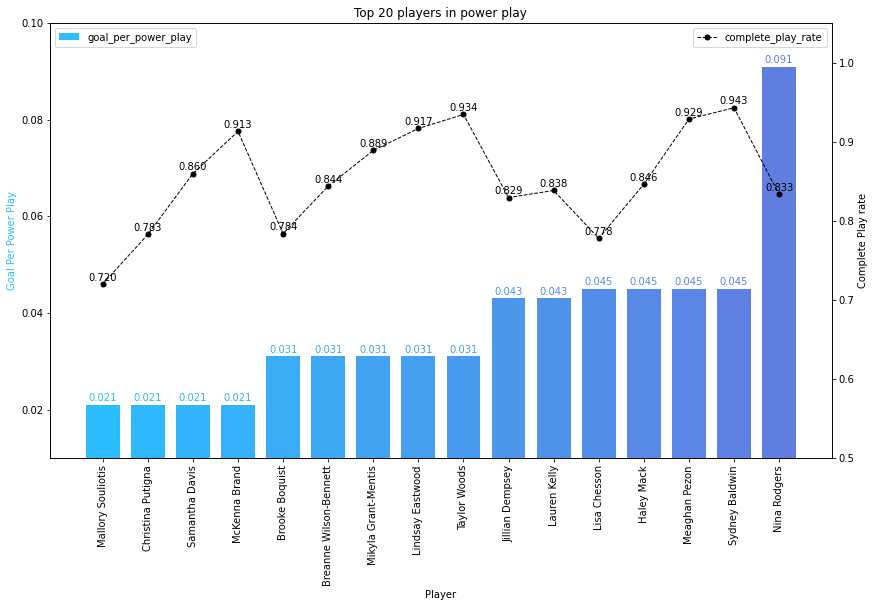

In [55]:
fig, ax1 = plt.subplots(figsize=(14,8))

X_axis = np.arange(len(df_top_pp_player))
p1 = ax1.bar(x=X_axis, height=df_top_pp_player["goal_per_power_play"], color=colors, width=0.75, label="goal_per_power_play")
ax1.set_xlabel('Player')
ax1.set_ylabel('Goal Per Power Play', color='#2cbdfe')
ax1.set_xticks(X_axis, df_top_pp_player['Player'], rotation=90)
ax1.set_ylim(0.01, 0.1)


add_value_labels(ax1, colors)
ax1.legend(loc='upper left')


ax2 = plt.twinx()
ax2.plot(X_axis, df_top_pp_player["complete_play_rate"], color='k', linestyle='--', marker='o', linewidth=1, markersize=5, label="complete_play_rate")
ax2.set_ylabel("Complete Play rate", color='k')
ax2.set_xticks(X_axis, df_top_pp_player['Player'], rotation=90)
ax2.set_ylim(0.5, 1.05)
for a, b in zip(X_axis, df_top_pp_player["complete_play_rate"]):
        plt.text(a, b+0.002, '%.3f' % b, ha='center', va='bottom', fontsize=10)

ax2.legend(loc='upper right')

plt.title("Top 20 players in power play")
plt.show()